In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# K-Nearest Neighbors (kNN)

$k$-Nearest neighbors is one of the simplest predictive models there is. 
The only things it requires are:
   1. Some notion of distance.
   2. An assumption that points that are close to one another are similar.

Let's say we've picked a number  $𝑘$  (like 3 or 5). Then, when we want to classify some new data point, we find the  𝑘  nearest labeled points and let them vote on the new ouput.

**Contents**

- [knn implementation](#1.knn-implementation)
- [Example: the MNIST dataset](#2.-Example:-the-MNIST-dataset)
- [Choosing k and weights](#3.-Choosing-k-and-weights)
- [Testing the classifier](#4.-Testing-the-classifier)
- [The Palmer Archipelago Penguin Data](#5.-The-Palmer-Archipelago-Penguin-Data)

## 1. knn implementation

In [2]:
def knn_classifier_slow(k,X,y,X_new):
    'one-loop version'
    '''
    INPUT
    k: number of neighbors
    X,y : data points and their classes
    X_new : points to be classified
    
    OUTPUT:
    y_pred: class predictions
    '''
    
    # number of points
    m = X.shape[0] # number of rows of X (number of points)
    m_new = X_new.shape[0] # number of rows of X_new (number of new points)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # initialize y_pred vector
    y_pred = np.zeros(m_new)

    for i in range(m_new):
        # distances from X_new[i] to data points X
        dist = np.linalg.norm(X-X_new[i], axis=1)
        # k nearest kneighbors
        knn = np.argsort(dist)[0:k] 
        # labels
        nearest_labels = y[knn]
        # majority vote; break ties by choosing the smaller label.                          
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes))
    return y_pred

In [3]:
def knn_classifier(k,X,y,X_new, weights='uniform'):
    'no-loop version'
    
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # number of classes
    n_classes = len(np.unique(y))
    
    
    
    # distance matrix
    dist = np.sqrt(np.sum(X_new**2,axis=1)[:,None]+np.sum(X**2,axis=1)[None,:]-2*X_new.dot(X.T))
    
    # k nearest neighbor
    knn = np.argsort(dist,axis=1)[:,0:k]
    
    y_pred = np.zeros(m_new)
    for i in range(m_new):
        # labels
        nearest_labels = y[knn[i]]
        # weights
        if weights=='uniform':
            w = np.ones(k)
        elif weights=='distance':
            w=1/dist[i,knn[i]]
        else:
            print('weights not recognized: should be uniform or distance')
            return 
        # prediction
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes, weights=w))
    
    return y_pred

## 2. Example: the MNIST (handwritten digits) dataset

In [4]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5) # display first 5 rows of the dataset

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [5]:
data.shape

(5000, 785)

In [6]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy() # labels

In [7]:
X.shape

(5000, 784)

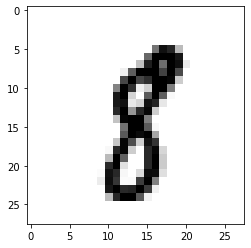

In [8]:
# each row is a 28 x 28 pixels image of a hand-written digit
row = 300 # grab a row
plt.imshow(X[row].reshape(28,28), cmap='binary')

In [9]:
y[row]

8

In [10]:
# load test data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits_test.csv'
test_data = pd.read_csv(url)

In [11]:
test_data.shape

(2000, 785)

In [12]:
X_test = test_data.iloc[:,0:784].to_numpy() # pixels
y_test = test_data['label'].to_numpy() # labels

In [13]:
%%time
y_test_pred = knn_classifier_slow(10,X,y,X_test)

Wall time: 1min 18s


In [14]:
%%time
y_test_pred = knn_classifier(10,X,y,X_test)

Wall time: 1 s


In [15]:
'confusion matrix'
n_classes = 10
C = np.zeros((n_classes,n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        C[i,j] = sum(y_test_pred[y_test==i]==j)
C

array([[202.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.],
       [  0., 222.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   7., 173.,   1.,   0.,   0.,   0.,   2.,   1.,   0.],
       [  0.,  12.,   6., 171.,   0.,   1.,   1.,   2.,   2.,   0.],
       [  0.,   7.,   0.,   0., 183.,   0.,   1.,   0.,   0.,  13.],
       [  1.,   2.,   0.,   2.,   0., 172.,   4.,   0.,   3.,   1.],
       [  2.,   2.,   0.,   0.,   0.,   1., 189.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.,   2.,   0.,   0., 201.,   0.,   6.],
       [  2.,  15.,   0.,   6.,   2.,   1.,   4.,   1., 145.,   7.],
       [  0.,   2.,   0.,   4.,   2.,   0.,   0.,   3.,   0., 204.]])

In [16]:
# percentage of correct classification
100*np.sum(y_test==y_test_pred)/len(y_test)

93.1

## 3. Choosing k and weights

We'll split the data (X,y) into a training set and a validation set 

In [17]:
# shuffle the data
permutation = np.random.permutation(X.shape[0]) 
X = X[permutation]
y = y[permutation]

In [18]:
# split data into train and validation sets
X_train, y_train = X[0:3000], y[0:3000]
X_val, y_val = X[3000:5000], y[3000:5000]

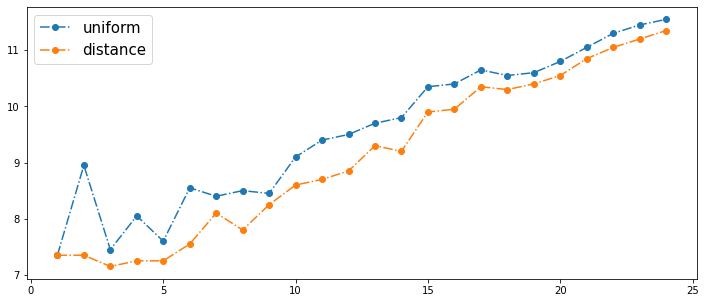

In [19]:
weights = ['uniform', 'distance']
k_list = np.arange(1,25)

plt.figure(figsize=(12,5))

for i in range(len(weights)):
    pct_incorrect = np.zeros(len(k_list))
    for j in range(len(k_list)):
        y_val_pred = knn_classifier(k_list[j],
                                    X_train,y_train,X_val,
                                    weights=weights[i])
        # percentage of incorrect classification
        pct_incorrect[j] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
    plt.plot(k_list, pct_incorrect,'o-.', label=weights[i])
plt.legend(fontsize=15)

## 4. Testing the classifier

In [20]:
y_test_pred = knn_classifier(4,X,y,X_test, weights='distance')

In [21]:
# percentage of correct classification
100*np.sum(y_test==y_test_pred)/len(y_test)

94.7

In [22]:
'confusion matrix'
n_classes = 10
C = np.zeros((n_classes,n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        C[i,j] = sum(y_test_pred[y_test==i]==j)
C

array([[203.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.],
       [  0., 222.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   5., 176.,   0.,   1.,   0.,   0.,   1.,   1.,   0.],
       [  0.,   4.,   6., 175.,   0.,   2.,   0.,   3.,   5.,   0.],
       [  0.,   5.,   0.,   0., 185.,   0.,   1.,   0.,   0.,  13.],
       [  1.,   0.,   0.,   2.,   0., 176.,   3.,   0.,   2.,   1.],
       [  2.,   1.,   0.,   0.,   0.,   2., 189.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 206.,   0.,   4.],
       [  1.,   4.,   1.,   7.,   4.,   0.,   1.,   2., 158.,   5.],
       [  0.,   2.,   0.,   4.,   2.,   1.,   0.,   2.,   0., 204.]])

## 5. The Palmer Archipelago Penguin Data

<img src="cute_penguins.png" alt="Drawing" style="width: 500px;"/>

Art by @allison_horst

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

In [80]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/penguins_size.csv'
data = pd.read_csv(url)
data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


This dataset contains data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica

In [71]:
data.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

The culmen is the upper ridge of a bird’s bill. 
For this penguin data, the culmen (bill) length and depth are measured as shown below.

<img src="culmen_depth.png" alt="Drawing" style="width: 500px;"/>

Some rows contain missing values.
We will drop them from the pandas dataframe.

In [81]:
data.dropna(axis=0,inplace=True)

The **goal** is to predict the penguin species. 
We'll use our knn classifier.

In [82]:
# map species to (0,1,2)
y = data.species.map({'Adelie': 0, 'Chinstrap' : 1, 'Gentoo' : 2}).to_numpy()

In [83]:
# feature matrix
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()

In [84]:
'shuffle the data'
m = len(y) # size of the dataset
permutation = np.random.permutation(m)
X = X[permutation]
y = y[permutation]

In [85]:
'split the data into training and validation sets'
X_train, y_train = X[0:200],y[0:200]
X_val, y_val = X[200:m], y[200:m]

Text(0.5, 0, 'k (number of neighbors)')

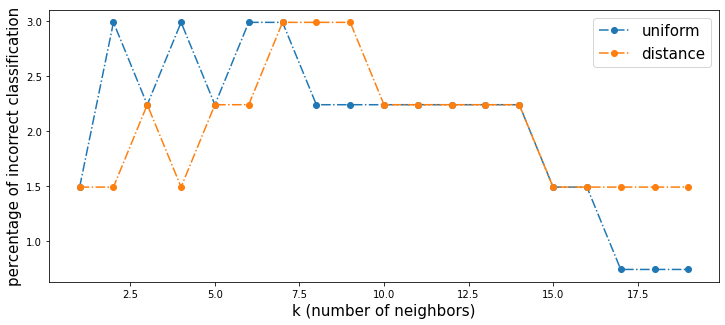

In [95]:
weights = ['uniform', 'distance']
k_list = np.arange(1,20)

plt.figure(figsize=(12,5))

for i in range(len(weights)):
    pct_incorrect = np.zeros(len(k_list))
    for j in range(len(k_list)):
        y_val_pred = knn_classifier(k_list[j],
                                    X_train,y_train,X_val,
                                    weights=weights[i])
        # percentage of incorrect classification
        pct_incorrect[j] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
    plt.plot(k_list, pct_incorrect,'o-.', label=weights[i])
plt.legend(fontsize=15)
plt.ylabel('percentage of incorrect classification', fontsize=15)
plt.xlabel('k (number of neighbors)', fontsize=15)

The knn classifier with the highest accuracy achieved 80% accuracy 

**Scaling the data**

The knn classifier is a distance based algorithm. 
Distance based algorithms are affected by the scale of the features. 
They give higher weightage to features which have higher magnitude (body_mass_g in our case).

We do not want our knn classifier to be affected by the magnitude of the features.
To overcome this problem, we can bring down all the variables to the same scale.

In [75]:
# option 1: subtract the mean and divide by the standard deviation
X = (X-X.mean(axis=0))/X.std(axis=0)

In [88]:
# option 2: divide by the max
X = X/X.max(axis=0)

Now, we can apply the knn classifier to the scaled data.

In [89]:
'shuffle the data'
m = len(y) # size of the dataset
permutation = np.random.permutation(m)
X = X[permutation]
y = y[permutation]

In [90]:
'split the data into training and validation sets'
X_train, y_train = X[0:200],y[0:200]
X_val, y_val = X[200:m], y[200:m]

Text(0.5, 0, 'k (number of neighbors)')

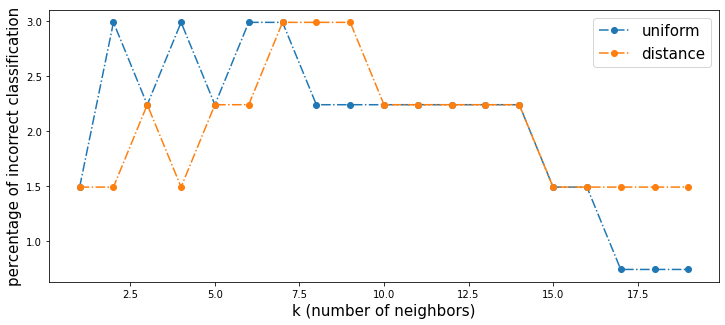

In [94]:
weights = ['uniform', 'distance']
k_list = np.arange(1,20)

plt.figure(figsize=(12,5))

for i in range(len(weights)):
    pct_incorrect = np.zeros(len(k_list))
    for j in range(len(k_list)):
        y_val_pred = knn_classifier(k_list[j],
                                    X_train,y_train,X_val,
                                    weights=weights[i])
        # percentage of incorrect classification
        pct_incorrect[j] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
    plt.plot(k_list, pct_incorrect,'o-.', label=weights[i])
plt.legend(fontsize=15)
plt.ylabel('percentage of incorrect classification', fontsize=15)
plt.xlabel('k (number of neighbors)', fontsize=15)

The knn classifier with the highest accuracy achieved 99% accuracy